1.0 PRÁCTICA

1.1 Extracción de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CSV ya arreglado: separado por comas
data = pd.read_csv('data/drugsComTest_raw.csv')

data.head()

data.info()

<class 'pandas.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Unnamed: 0   53766 non-null  int64
 1   drugName     53766 non-null  str  
 2   condition    53471 non-null  str  
 3   review       53766 non-null  str  
 4   rating       53766 non-null  str  
 5   date         53766 non-null  str  
 6   usefulCount  53766 non-null  int64
dtypes: int64(2), str(5)
memory usage: 2.9 MB


1.2 Trato de datos NULL

In [2]:
#Tabla rating
# 0) Comprobación rápida antes de limpiar
print("dtype rating (antes):", data["rating"].dtype)
print("nulos rating (antes):", data["rating"].isna().sum())

# 1) Forzar conversión a numérico (lo no-convertible pasa a NaN)
data["rating"] = pd.to_numeric(data["rating"], errors="coerce")

# 2) Contar los NaN (después de convertir)
print(f"La suma de valores nulos en rating es: {data['rating'].isna().sum()}")

# 3) Check de rango (ratings deberían estar entre 0 y 10)
print("min rating:", data["rating"].min(), "max rating:", data["rating"].max())

print(f"La mediana de los ratings es: {data['rating'].median()}")
#Como rating no es nuestra variavle explicita y no sesgará el resultado la vamos a modificar
#Utilizaremos la mediana para rellenar los valores nulos 
data["rating"] = data["rating"].fillna(data["rating"].median())



dtype rating (antes): str
nulos rating (antes): 0
La suma de valores nulos en rating es: 1
min rating: 1.0 max rating: 10.0
La mediana de los ratings es: 8.0


In [3]:
# Tabla drugName
# 0) Comprobación rápida antes de limpiar
print("dtype drugName (antes):", data["drugName"].dtype)
print("nulos drugName (antes):", data["drugName"].isna().sum())

# 1) Asegurar tipo string
data["drugName"] = data["drugName"].astype(str)
data["drugName"] = data["drugName"].replace("", np.nan).replace("nan", np.nan)

# 2) Contar los NaN (después de limpiar)
print(f"La suma de valores nulos en drugName es: {data['drugName'].isna().sum()}")

# 3) Moda para rellenar nulos
print(f"La moda de drugName es: {data['drugName'].mode().iloc[0]}")
data["drugName"] = data["drugName"].fillna(data["drugName"].mode().iloc[0])

dtype drugName (antes): str
nulos drugName (antes): 0
La suma de valores nulos en drugName es: 0
La moda de drugName es: Levonorgestrel


In [4]:
# Tabla condition
# 0) Comprobación rápida antes de limpiar
print("dtype condition (antes):", data["condition"].dtype)
print("nulos condition (antes):", data["condition"].isna().sum())

# 1) Asegurar tipo string
data["condition"] = data["condition"].astype(str)
data["condition"] = data["condition"].replace("", np.nan).replace("nan", np.nan)

# 2) Contar los NaN (después de limpiar)
print(f"La suma de valores nulos en condition es: {data['condition'].isna().sum()}")

# 3) Moda para rellenar nulos
print(f"La moda de condition es: {data['condition'].mode().iloc[0]}")
data["condition"] = data["condition"].fillna(data["condition"].mode().iloc[0])

dtype condition (antes): str
nulos condition (antes): 295
La suma de valores nulos en condition es: 295
La moda de condition es: Birth Control


In [5]:
# Tabla review
# 0) Comprobación rápida antes de limpiar
print("dtype review (antes):", data["review"].dtype)
print("nulos review (antes):", data["review"].isna().sum())

# 1) Asegurar tipo string
data["review"] = data["review"].astype(str)
data["review"] = data["review"].replace("", np.nan).replace("nan", np.nan)

# 2) Contar los NaN (después de limpiar)
print(f"La suma de valores nulos en review es: {data['review'].isna().sum()}")

# 3) Rellenar nulos con placeholder (la moda en textos largos puede no ser representativa)
data["review"] = data["review"].fillna("(No review)")

dtype review (antes): str
nulos review (antes): 0
La suma de valores nulos en review es: 0


In [6]:
# Tabla date
# 0) Comprobación rápida antes de limpiar
print("dtype date (antes):", data["date"].dtype)
print("nulos date (antes):", data["date"].isna().sum())

# 1) Convertir a datetime (lo no convertible pasa a NaT)
data["date"] = pd.to_datetime(data["date"], errors="coerce")

# 2) Contar los NaN (después de convertir)
print(f"La suma de valores nulos en date es: {data['date'].isna().sum()}")

# 3) Rellenar nulos con la moda (fecha más frecuente)
print(f"La moda de date es: {data['date'].mode().iloc[0]}")
data["date"] = data["date"].fillna(data["date"].mode().iloc[0])

dtype date (antes): str
nulos date (antes): 0
La suma de valores nulos en date es: 361
La moda de date es: 2017-04-11 00:00:00


In [7]:
# Tabla usefulCount
# 0) Comprobación rápida antes de limpiar
print("dtype usefulCount (antes):", data["usefulCount"].dtype)
print("nulos usefulCount (antes):", data["usefulCount"].isna().sum())

# 1) Forzar conversión a numérico (lo no-convertible pasa a NaN)
data["usefulCount"] = pd.to_numeric(data["usefulCount"], errors="coerce")

# 2) Contar los NaN (después de convertir)
print(f"La suma de valores nulos en usefulCount es: {data['usefulCount'].isna().sum()}")

# 3) Check de rango (conteos no negativos)
print("min usefulCount:", data["usefulCount"].min(), "max usefulCount:", data["usefulCount"].max())

print(f"La mediana de usefulCount es: {data['usefulCount'].median()}")
data["usefulCount"] = data["usefulCount"].fillna(data["usefulCount"].median())

dtype usefulCount (antes): int64
nulos usefulCount (antes): 0
La suma de valores nulos en usefulCount es: 0
min usefulCount: 0 max usefulCount: 949
La mediana de usefulCount es: 16.0


### 2. Exploración de datos (EDA)

Análisis y visualización del dataset tras el tratamiento de nulos.

#### 2.1 Tamaño del dataset

In [8]:
n_filas, n_cols = data.shape
memoria_mb = data.memory_usage(deep=True).sum() / 1024**2

print(f"Número de filas: {n_filas:,}")
print(f"Número de columnas: {n_cols}")
print(f"Uso de memoria (aprox.): {memoria_mb:.2f} MB")
print(f"Total de valores (celdas): {n_filas * n_cols:,}")

Número de filas: 53,766
Número de columnas: 7
Uso de memoria (aprox.): 34.15 MB
Total de valores (celdas): 376,362


#### 2.2 Tipos de variables

Tipos por columna:
Unnamed: 0              int64
drugName                  str
condition                 str
review                    str
rating                float64
date           datetime64[us]
usefulCount             int64
dtype: object

Variables numéricas: 3 (rating, usefulCount, Unnamed: 0)
Variables categóricas/texto: 3 (drugName, condition, review, date)


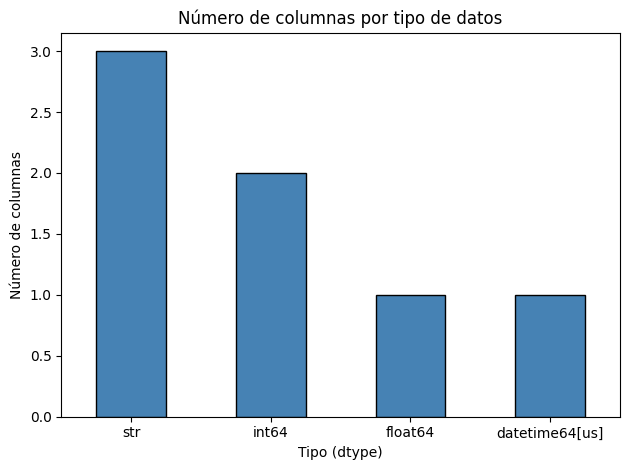

In [9]:
tipos = data.dtypes
print("Tipos por columna:")
print(tipos)
print()

# Número de variables numéricas vs categóricas/texto
numericas = (tipos == "int64") | (tipos == "float64")
categoricas = (tipos == "object") | (tipos == "str")
print(f"Variables numéricas: {numericas.sum()} (rating, usefulCount, Unnamed: 0)")
print(f"Variables categóricas/texto: {categoricas.sum()} (drugName, condition, review, date)")

# Gráfico sencillo: número de columnas por tipo
data.dtypes.value_counts().plot(kind="bar", color="steelblue", edgecolor="black")
plt.title("Número de columnas por tipo de datos")
plt.xlabel("Tipo (dtype)")
plt.ylabel("Número de columnas")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Interpretación: tenemos mayormente texto (reviews, nombres, condiciones, fechas) y algunas numéricas
# (rating, usefulCount) relevantes para modelado.

#### 2.3 Distribución de la variable objetivo (rating)

Consideramos **rating** (1–10) como variable objetivo (ej.: predicción de valoración o clasificación).

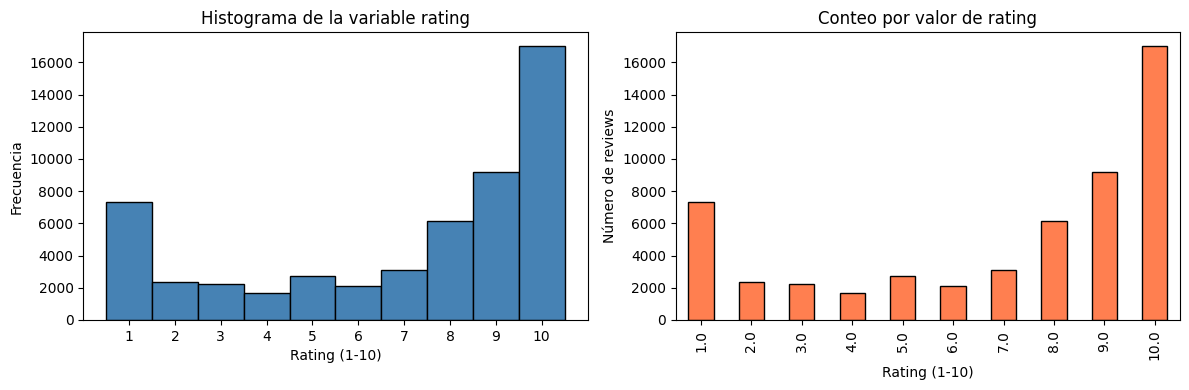

Estadísticos descriptivos de rating:
count    53766.000000
mean         6.977030
std          3.285109
min          1.000000
25%          4.000000
50%          8.000000
75%         10.000000
max         10.000000
Name: rating, dtype: float64


In [10]:
# Distribución de rating
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histograma
axes[0].hist(data["rating"].dropna(), bins=range(1, 12), align="left", color="steelblue", edgecolor="black")
axes[0].set_xlabel("Rating (1-10)")
axes[0].set_ylabel("Frecuencia")
axes[0].set_title("Histograma de la variable rating")
axes[0].set_xticks(range(1, 11))

# Diagrama de barras (conteo por valor)
data["rating"].value_counts().sort_index().plot(kind="bar", ax=axes[1], color="coral", edgecolor="black")
axes[1].set_xlabel("Rating (1-10)")
axes[1].set_ylabel("Número de reviews")
axes[1].set_title("Conteo por valor de rating")
plt.tight_layout()
plt.show()

print("Estadísticos descriptivos de rating:")
print(data["rating"].describe())

# Interpretación: la distribución de rating está sesgada hacia valores altos (8–10);
# hay menos reviews con valoraciones bajas. Es típico en reviews de productos.

#### 2.4 Posible desbalanceo de clases

Si tratamos **rating** como variable objetivo (por clases), comprobamos si las clases están desbalanceadas.

Conteo y porcentaje por clase (rating):
        conteo  porcentaje (%)
rating                        
1.0       7298            13.6
2.0       2334             4.3
3.0       2205             4.1
4.0       1659             3.1
5.0       2710             5.0
6.0       2119             3.9
7.0       3091             5.7
8.0       6157            11.5
9.0       9177            17.1
10.0     17016            31.6

Clase más frecuente: 10.0 (n=17016)
Clase menos frecuente: 4.0 (n=1659)
Ratio máx/min: 10.3x → hay desbalanceo notable.


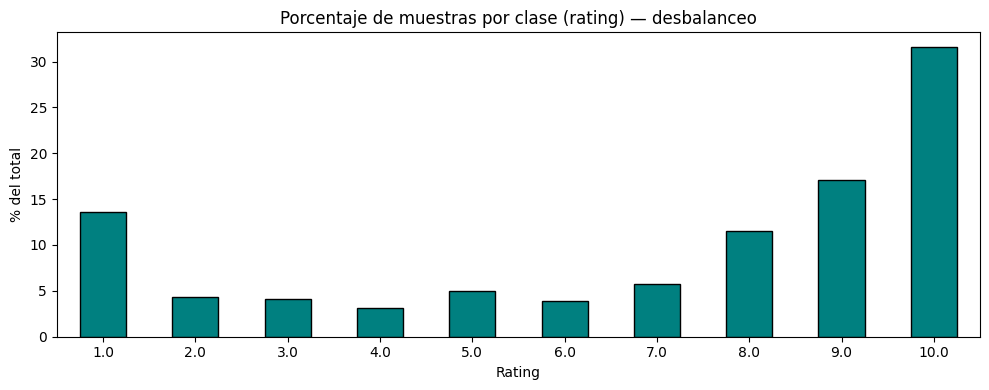

In [11]:
# Desbalanceo: proporción de cada clase (rating 1-10)
counts = data["rating"].value_counts().sort_index()
proporciones = (counts / len(data) * 100).round(1)

print("Conteo y porcentaje por clase (rating):")
print(pd.DataFrame({"conteo": counts, "porcentaje (%)": proporciones}))
print()

# Ratio entre la clase más frecuente y la menos frecuente
max_c = counts.max()
min_c = counts.min()
ratio = max_c / min_c
print(f"Clase más frecuente: {counts.idxmax()} (n={max_c})")
print(f"Clase menos frecuente: {counts.idxmin()} (n={min_c})")
print(f"Ratio máx/min: {ratio:.1f}x → hay desbalanceo notable.")

# Gráfico de barras con porcentajes
proporciones.plot(kind="bar", color="teal", edgecolor="black", figsize=(10, 4))
plt.title("Porcentaje de muestras por clase (rating) — desbalanceo")
plt.xlabel("Rating")
plt.ylabel("% del total")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Interpretación: las clases no están equilibradas; los ratings 8–10 dominan.
# Para clasificación convendría estrategias como muestreo (oversampling/undersampling),
# pesos por clase o métricas adecuadas (F1, AUC) en lugar de solo accuracy.